<a href="https://colab.research.google.com/github/SoA-Lee/Moon-Study/blob/master/boston_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
#랜덤 시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정:", SEED)

시드 고정: 12


In [ ]:
#skleran 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape,y_data.shape)

(506, 13) (506,)


In [ ]:
#피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [ ]:
#학습-테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,shuffle=True,random_state=SEED)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
#심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
  model = Sequential()
  model.add(Dense(128,activation='relu',input_dim=num_input))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(1,activation='relu'))

  model.compile(optimizer='adam',loss='mse',metrics=['mae'])

  return model
model = build_model(num_input=13)
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 훈련
model.fit(X_train, y_train,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
13/13 - 1s - loss: 90.2208 - mae: 7.0756
Epoch 2/100
13/13 - 0s - loss: 64.1642 - mae: 5.7309
Epoch 3/100
13/13 - 0s - loss: 64.0255 - mae: 5.6375
Epoch 4/100
13/13 - 0s - loss: 59.8935 - mae: 5.7237
Epoch 5/100
13/13 - 0s - loss: 56.3740 - mae: 5.4424
Epoch 6/100
13/13 - 0s - loss: 64.8597 - mae: 5.7255
Epoch 7/100
13/13 - 0s - loss: 55.9070 - mae: 5.6685
Epoch 8/100
13/13 - 0s - loss: 59.0239 - mae: 5.4474
Epoch 9/100
13/13 - 0s - loss: 53.3004 - mae: 5.2688
Epoch 10/100
13/13 - 0s - loss: 46.8453 - mae: 4.8642
Epoch 11/100
13/13 - 0s - loss: 49.0438 - mae: 5.0323
Epoch 12/100
13/13 - 0s - loss: 46.4895 - mae: 4.8189
Epoch 13/100
13/13 - 0s - loss: 58.3394 - mae: 5.6123
Epoch 14/100
13/13 - 0s - loss: 42.3440 - mae: 4.6123
Epoch 15/100
13/13 - 0s - loss: 44.8931 - mae: 4.6854
Epoch 16/100
13/13 - 0s - loss: 38.6946 - mae: 4.3805
Epoch 17/100
13/13 - 0s - loss: 39.6368 - mae: 4.5910
Epoch 18/100
13/13 - 0s - loss: 39.9005 - mae: 4.5373
Epoch 19/100
13/13 - 0s - loss: 35.73

In [ ]:
#평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 24.4812 - mae: 3.5069


[24.48122215270996, 3.5068814754486084]

In [ ]:
model = build_model(num_input=13)
history = model.fit(X_train,y_train,batch_size=32,epochs=200,validation_split=0.25,verbose=2)

Epoch 1/200
10/10 - 1s - loss: 1237.2273 - mae: 25.6319 - val_loss: 181.4406 - val_mae: 11.0436
Epoch 2/200
10/10 - 0s - loss: 172.0374 - mae: 10.3364 - val_loss: 102.9056 - val_mae: 7.0507
Epoch 3/200
10/10 - 0s - loss: 88.3426 - mae: 6.7461 - val_loss: 60.3246 - val_mae: 6.2380
Epoch 4/200
10/10 - 0s - loss: 76.0711 - mae: 6.6196 - val_loss: 59.9225 - val_mae: 5.6343
Epoch 5/200
10/10 - 0s - loss: 73.5757 - mae: 6.1326 - val_loss: 59.5306 - val_mae: 5.9455
Epoch 6/200
10/10 - 0s - loss: 72.6879 - mae: 6.0497 - val_loss: 58.8538 - val_mae: 5.3517
Epoch 7/200
10/10 - 0s - loss: 70.4425 - mae: 5.7623 - val_loss: 55.3603 - val_mae: 5.8217
Epoch 8/200
10/10 - 0s - loss: 71.0295 - mae: 6.3172 - val_loss: 54.2397 - val_mae: 5.2034
Epoch 9/200
10/10 - 0s - loss: 70.3441 - mae: 5.6543 - val_loss: 53.1692 - val_mae: 5.4573
Epoch 10/200
10/10 - 0s - loss: 69.5205 - mae: 6.0206 - val_loss: 52.7474 - val_mae: 5.1982
Epoch 11/200
10/10 - 0s - loss: 67.7216 - mae: 5.8155 - val_loss: 52.3374 - val_m

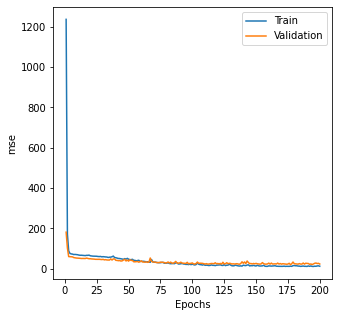

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(total_epoch=10,start=1):
  plt.figure(figsize=(5,5))
  plt.plot(range(start,total_epoch+1),
           history.history['loss'][start-1:total_epoch],
           label='Train')
  plt.plot(range(start,total_epoch+1),
          history.history['val_loss'][start-1:total_epoch],
          label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('mse')
  plt.legend()
  plt.show()

plot_loss_curve(total_epoch=200,start=1)

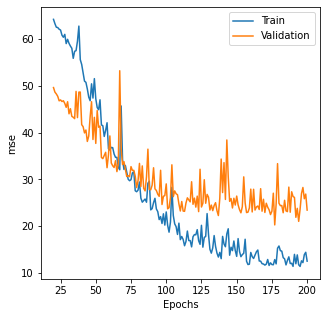

In [ ]:
plot_loss_curve(total_epoch=200,start=20)